In [119]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
import tensorflow_datasets as tfds

from keras.utils import np_utils

import matplotlib.pyplot as plt

%matplotlib inline

import numpy as np

In [120]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [121]:
X_train = X_train / 255
X_test = X_test / 255

In [132]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = 10

In [133]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

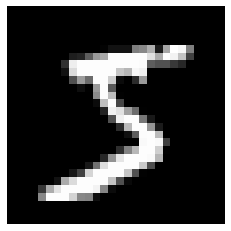

In [134]:
image = X_train[0]
plt.imshow(image, cmap="gray")
plt.axis("off")
plt.show()

In [135]:
image.max()

1.0

In [151]:
model = Sequential([
    Conv2D(16, 3, input_shape=(28, 28, 1), activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Conv2D(32, 3, activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(50, activation='relu'),
    Dense(num_classes, activation='softmax')
])

In [152]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [153]:
epochs = 5
batch_size = 64

model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=epochs,
    batch_size=batch_size
)

Epoch 1/5
938/938 [==============================] - 3s 3ms/step - loss: 1.5884 - accuracy: 0.8810 - val_loss: 1.4903 - val_accuracy: 0.9730
Epoch 2/5
938/938 [==============================] - 3s 3ms/step - loss: 1.4969 - accuracy: 0.9657 - val_loss: 1.4797 - val_accuracy: 0.9825
Epoch 3/5
938/938 [==============================] - 3s 3ms/step - loss: 1.4878 - accuracy: 0.9744 - val_loss: 1.4785 - val_accuracy: 0.9834
Epoch 4/5
938/938 [==============================] - 3s 3ms/step - loss: 1.4838 - accuracy: 0.9782 - val_loss: 1.4784 - val_accuracy: 0.9834
Epoch 5/5
938/938 [==============================] - 3s 3ms/step - loss: 1.4815 - accuracy: 0.9804 - val_loss: 1.4756 - val_accuracy: 0.9860


In [154]:
model.save("model.h5")

In [155]:
!tensorflowjs_converter --input_format=keras model.h5 js_model

2020-11-15 15:04:00.448962: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1


handwritten.html  handwritten.ipynb  js_model  model  model.h5	python
